In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000318300"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000318300
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,PEOPLES BANCORP INC
Ticker,PEBO


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,43.0,2.184628e+01,2.526165e+00,18.36,1.968500e+01,21.39,2.399500e+01,27.19
interest income,41.0,2.501393e+07,7.095542e+06,16066000.00,1.847500e+07,24159000.00,2.892100e+07,40638000.00
net income,44.0,4.961885e+06,4.040273e+06,-4065000.00,2.566500e+06,4237000.00,7.817000e+06,14369000.00
net interest income,55.0,2.308309e+07,8.500188e+06,12975000.00,1.534050e+07,25767000.00,2.912200e+07,53217000.00
provision for loan losses,45.0,2.609978e+06,3.341973e+06,-2137000.00,6.240000e+05,1115000.00,5.311000e+06,13442000.00
total revenue,1.0,8.434200e+07,NaN,84342000.00,8.434200e+07,84342000.00,8.434200e+07,84342000.00


# Plots

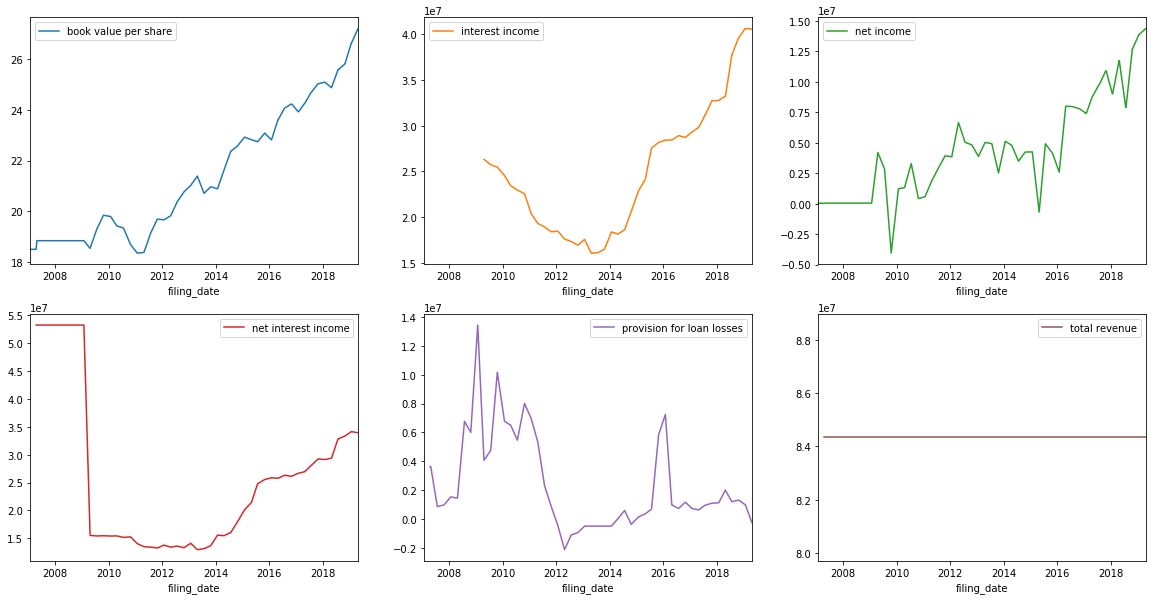

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000318300 book value per share        2007Q2 to 2008Q4: 7 periods    missing   
           interest income             2006Q4 to 2008Q4: 9 periods    missing   
           net income                                       2006Q4  duplicate   
           net income                  2007Q2 to 2008Q4: 7 periods    missing   
           net interest income         2007Q1 to 2008Q4: 8 periods    missing   
           provision for loan losses                        2007Q1    missing   
           provision for loan losses   2013Q1 to 2013Q4: 4 periods    missing   
           total revenue              2007Q1 to 2019Q1: 49 periods    missing   

                                               message  
cik        item                                         
0000318300 book value per share         Missing period  
           interest income              Missing period  
           net income                 Duplicate period  
           net income                   Missing period  
           net interest income          Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()